## A. Data Loading and Exploration

Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
Loan = pd.read_csv('Bank+Data+-+Full+Data+-For+final+Day.csv')

In [3]:
Loan.head() # Display of 5 records

,Roll Number Part 1,ID,Gender,DOB,LeadCreationDate,City_Code,City_Feature,Employee_No,Employer_type1,Employer_type2,Income,Customer_bank_code,ExistingBankType,Contacted,Source,Source_Cat,Existing_EMI,Feature1,Approved
0,381,APPP10987536114,Female,17/06/93,02/09/16,C10002,A,COM0052877,A,4,1.4,B029,G,N,S122,G,0.0,0,0
1,884,APPJ10857173523,Female,16/04/91,03/07/16,C10003,A,COM0000002,C,1,2.3,B005,P,N,S133,C,0.0,0,0
2,34,APPN40005263144,Female,22/11/86,04/07/16,C10001,A,COM0005816,A,4,3.5,B002,P,N,S133,C,0.0,0,0
3,920,APPF20377669543,Female,11/01/90,05/08/16,C10001,A,COM0000005,A,1,200.0,B001,P,N,S122,B,0.0,0,0
4,163,APPL30007442336,Female,03/04/94,23/08/16,C10043,B,COM0023428,A,4,200.0,B003,G,N,S133,B,0.0,0,0


Used pandas library to read the data

In [4]:
# Information of the features
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Roll Number Part 1  1982 non-null   int64  
 1   ID                  1982 non-null   object 
 2   Gender              1982 non-null   object 
 3   DOB                 1982 non-null   object 
 4   LeadCreationDate    1982 non-null   object 
 5   City_Code           1982 non-null   object 
 6   City_Feature        1982 non-null   object 
 7   Employee_No         1982 non-null   object 
 8   Employer_type1      1982 non-null   object 
 9   Employer_type2      1982 non-null   int64  
 10  Income              1982 non-null   float64
 11  Customer_bank_code  1982 non-null   object 
 12  ExistingBankType    1982 non-null   object 
 13  Contacted           1982 non-null   object 
 14  Source              1982 non-null   object 
 15  Source_Cat          1982 non-null   object 
 16  Existi

Missing Values in percentage

In [5]:
Loan.isnull().sum()/len(Loan)*100 # loan.isnull().sum()

Roll Number Part 1    0.0
ID                    0.0
Gender                0.0
DOB                   0.0
LeadCreationDate      0.0
City_Code             0.0
City_Feature          0.0
Employee_No           0.0
Employer_type1        0.0
Employer_type2        0.0
Income                0.0
Customer_bank_code    0.0
ExistingBankType      0.0
Contacted             0.0
Source                0.0
Source_Cat            0.0
Existing_EMI          0.0
Feature1              0.0
Approved              0.0
dtype: float64

No missing Values found

In [6]:
# Duplicate Records 
Loan[Loan.duplicated()].sum().sum()

0.0

No Duplicated records found

###  Analysing Target Variable - Approved

In [7]:
print(Loan['Approved'].dtype)
Loan['Approved'].value_counts()

int64


0    991
1    991
Name: Approved, dtype: int64

Text(0.5, 1.0, 'Count plot of Loan Approvel')

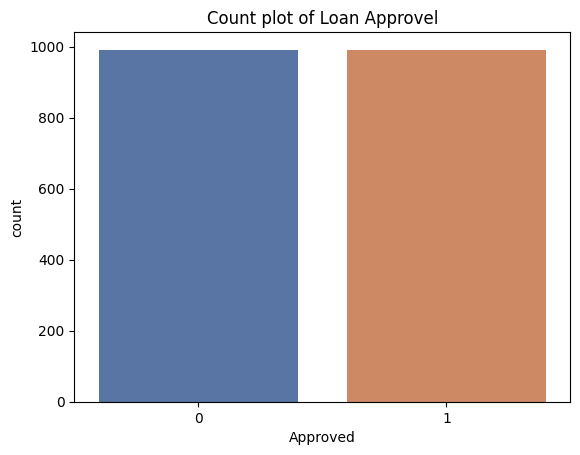

In [8]:
sns.countplot(data = Loan , x = 'Approved' , palette = 'deep')
plt.title('Count plot of Loan Approvel')

Equal number of Approved and Not Approved (50% - 50%) , Balanced 

## B. Data Cleaning and Exploratory Data Analysis.

### 1) Creating new dataframe with  'features - Gender', 'City_feature', 'Employer_type1','Employer_type2',’Income’,’ExistingBankType','Source_Cat','Existing_EMI',’Feature1',‘Approved’


In [9]:
Loan = Loan[['Gender', 'City_Feature', 'Employer_type1','Employer_type2','Income','ExistingBankType','Source_Cat','Existing_EMI','Feature1','Approved']]

In [10]:
Loan.head()

,Gender,City_Feature,Employer_type1,Employer_type2,Income,ExistingBankType,Source_Cat,Existing_EMI,Feature1,Approved
0,Female,A,A,4,1.4,G,G,0.0,0,0
1,Female,A,C,1,2.3,P,C,0.0,0,0
2,Female,A,A,4,3.5,P,C,0.0,0,0
3,Female,A,A,1,200.0,P,B,0.0,0,0
4,Female,B,A,4,200.0,G,B,0.0,0,0


In [11]:
# info of the Dataframe with Selected feture
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1982 non-null   object 
 1   City_Feature      1982 non-null   object 
 2   Employer_type1    1982 non-null   object 
 3   Employer_type2    1982 non-null   int64  
 4   Income            1982 non-null   float64
 5   ExistingBankType  1982 non-null   object 
 6   Source_Cat        1982 non-null   object 
 7   Existing_EMI      1982 non-null   float64
 8   Feature1          1982 non-null   int64  
 9   Approved          1982 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 155.0+ KB


In [12]:
# Categorical Features 
Loan.select_dtypes(include = 'object').columns

Index(['Gender', 'City_Feature', 'Employer_type1', 'ExistingBankType',
       'Source_Cat'],
      dtype='object')

In [13]:
# Numerical Features
Loan.select_dtypes(exclude = 'object').columns

Index(['Employer_type2', 'Income', 'Existing_EMI', 'Feature1', 'Approved'], dtype='object')

## Analysis of the Predictors

### 1. Gender

In [14]:
Loan.Gender.value_counts()

Male      1296
Female     686
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Count plot with filter')

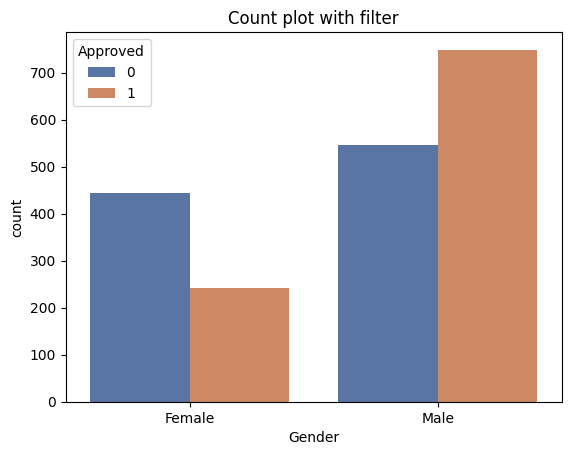

In [15]:
sns.countplot(data = Loan , x = 'Gender' , palette = 'deep' , hue = 'Approved')
plt.title('Count plot with filter')

Text(0.5, 1.0, 'Income vs Gender')

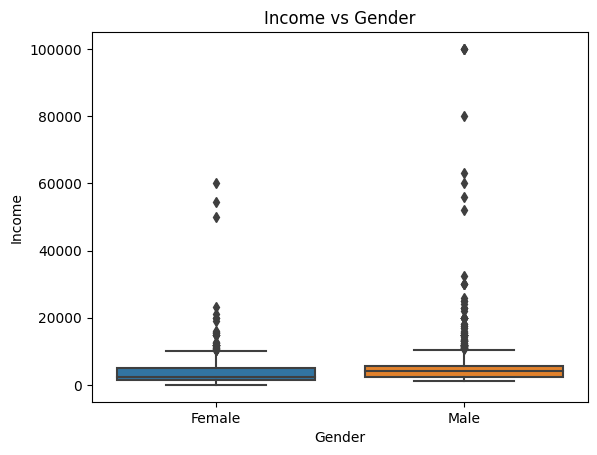

In [16]:
sns.boxplot(data = Loan , x = 'Gender' , y = 'Income')
plt.title('Income vs Gender')

### 2. City_Feature

In [17]:
Loan.City_Feature.value_counts()

A    1525
C     263
B     194
Name: City_Feature, dtype: int64

Text(0.5, 1.0, 'Count Plot of City Feature')

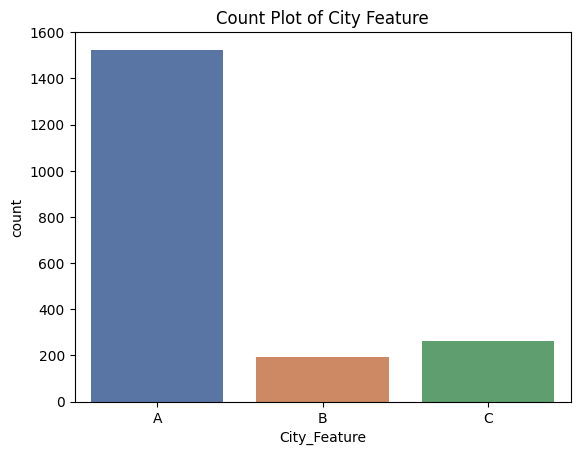

In [18]:
sns.countplot(data = Loan , x = 'City_Feature' , palette = 'deep')
plt.title('Count Plot of City Feature')

Text(0.5, 1.0, 'Income vs City_Feature')

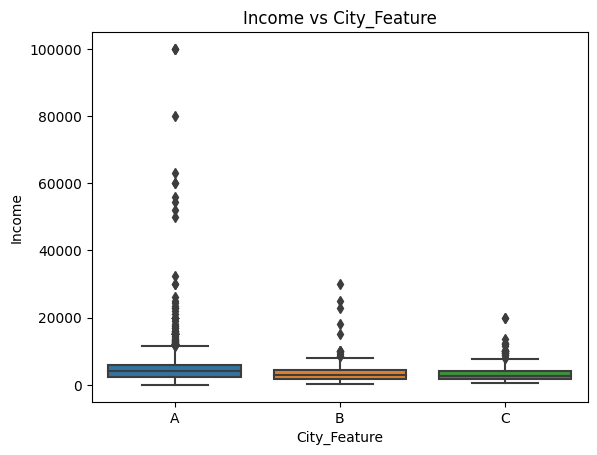

In [19]:
sns.boxplot(data = Loan , x = 'City_Feature' , y = 'Income')
plt.title('Income vs City_Feature')

### 3. Employer_type1

In [20]:
Loan.Employer_type1.value_counts()

A    832
B    627
C    523
Name: Employer_type1, dtype: int64

<AxesSubplot: xlabel='Employer_type1', ylabel='count'>

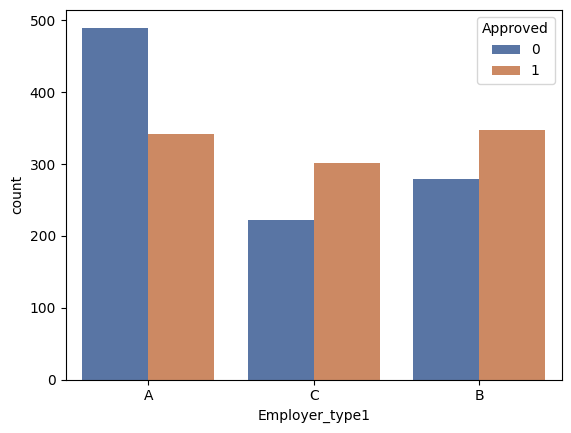

In [21]:
sns.countplot(data = Loan , x = 'Employer_type1' , palette = 'deep' , hue='Approved')

Text(0.5, 1.0, 'Income vs Employer_type1')

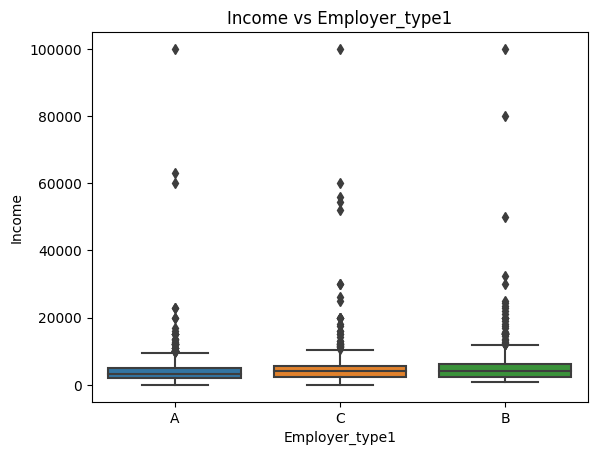

In [22]:
sns.boxplot(data = Loan , x = 'Employer_type1' , y = 'Income')
plt.title('Income vs Employer_type1')

### 4. Employer_type2

In [23]:
Loan.Employer_type2.value_counts()

4    1703
1     145
2      89
3      45
Name: Employer_type2, dtype: int64

<AxesSubplot: xlabel='Employer_type2', ylabel='count'>

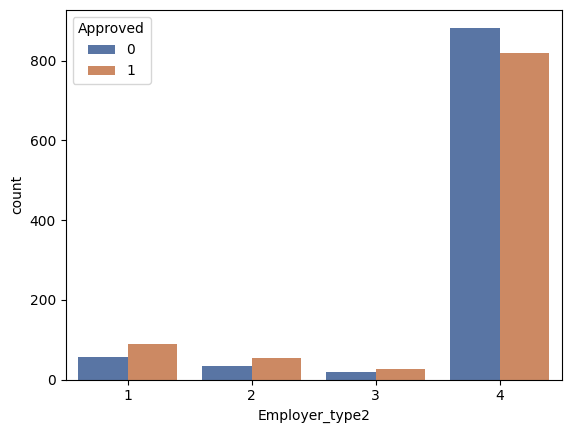

In [24]:
sns.countplot(data = Loan , x = 'Employer_type2' , palette = 'deep' , hue='Approved')

Text(0.5, 1.0, 'Income vs Employer_type2')

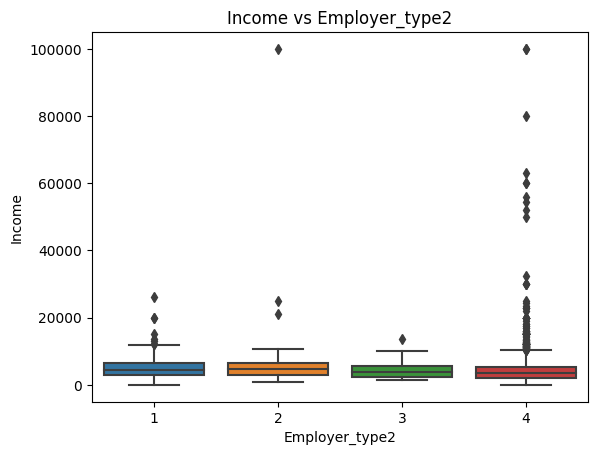

In [25]:
sns.boxplot(data = Loan , x = 'Employer_type2' , y = 'Income')
plt.title('Income vs Employer_type2')

### 5. Income

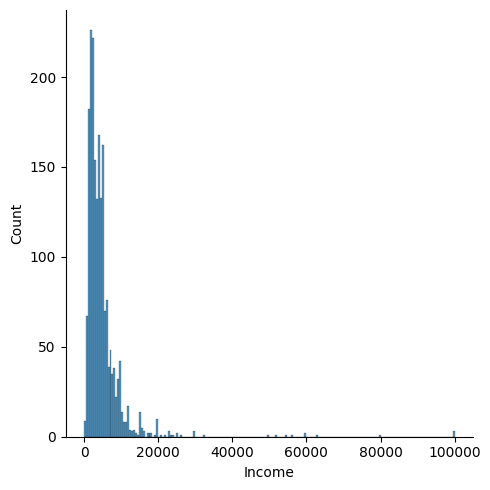

In [26]:
sns.displot(data = Loan , x = 'Income')

<AxesSubplot: xlabel='Approved', ylabel='Income'>

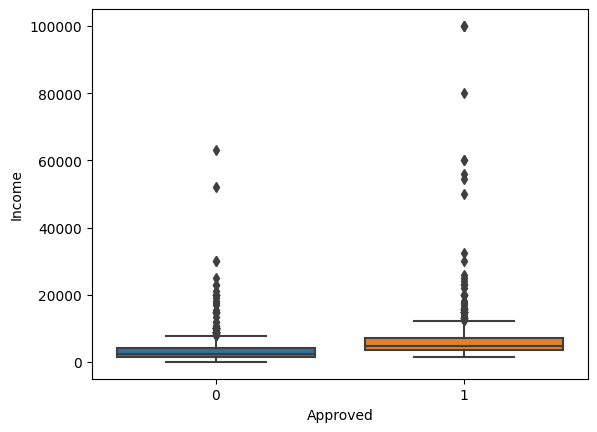

In [27]:
sns.boxplot(data = Loan , y = 'Income' , x = 'Approved')


### 6. ExistingBankType

In [28]:
Loan.ExistingBankType.value_counts()

P    1448
G     534
Name: ExistingBankType, dtype: int64

<AxesSubplot: xlabel='ExistingBankType', ylabel='count'>

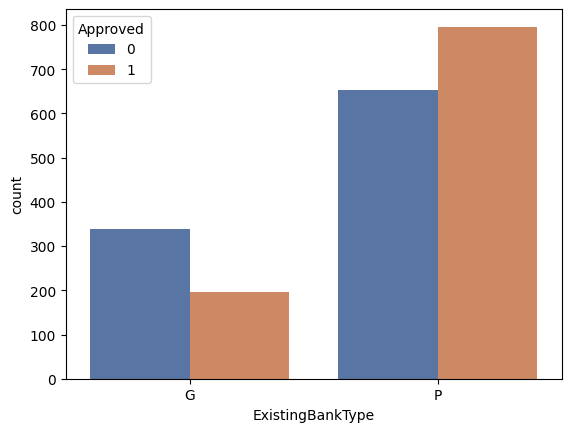

In [29]:
sns.countplot(data = Loan , x = 'ExistingBankType' , palette = 'deep' , hue='Approved')

Text(0.5, 1.0, 'Income vs ExistingBankType')

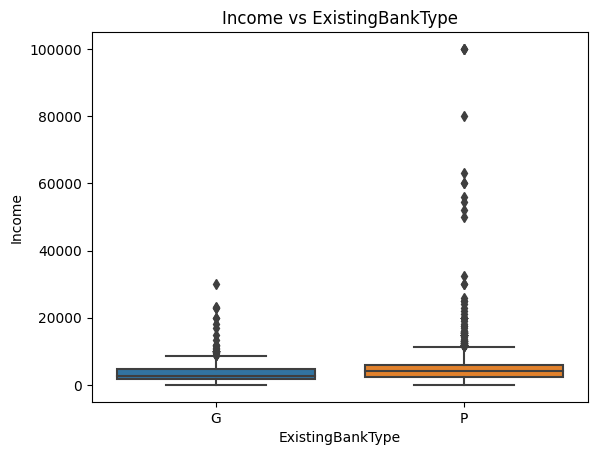

In [30]:
sns.boxplot(data = Loan , x = 'ExistingBankType' , y = 'Income')
plt.title('Income vs ExistingBankType')

### 7. Source_Cat

In [31]:
Loan.Source_Cat.value_counts()

B    909
G    697
C    331
E     30
F     15
Name: Source_Cat, dtype: int64

Text(0.5, 1.0, 'Count plot of Type of Source')

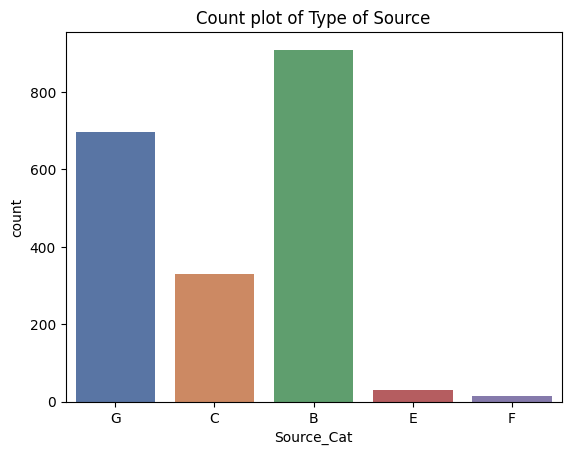

In [32]:
sns.countplot(data = Loan , x = 'Source_Cat' , palette = 'deep')
plt.title('Count plot of Type of Source')

Text(0.5, 1.0, 'Income vs Source_Cat')

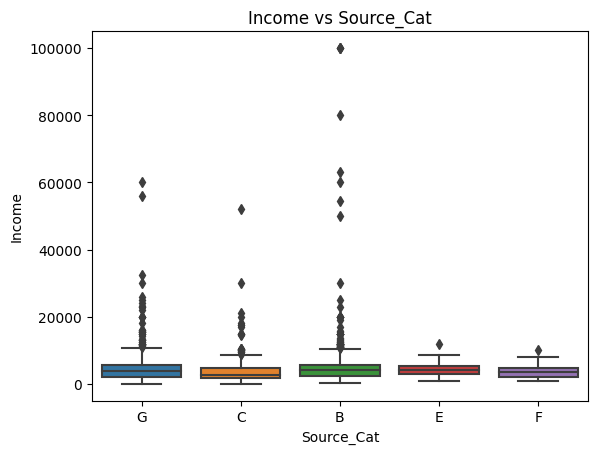

In [33]:
sns.boxplot(data = Loan , x = 'Source_Cat' , y = 'Income')
plt.title('Income vs Source_Cat')

### 8. Existing_EMI

In [34]:
Loan.Existing_EMI.dtypes

dtype('float64')

Text(0.5, 1.0, 'Distribution of Existing EMI data')

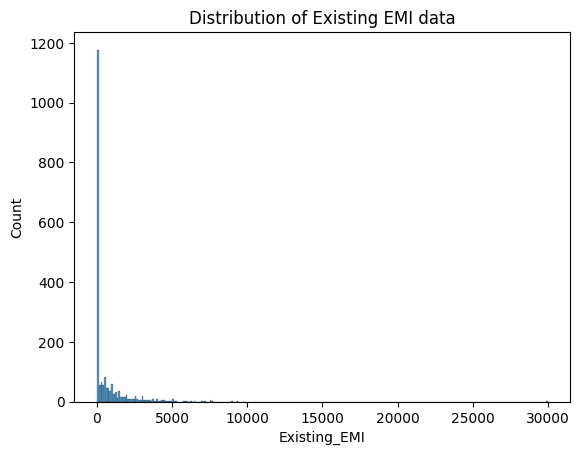

In [35]:
sns.histplot(data = Loan , x = 'Existing_EMI')
plt.title('Distribution of Existing EMI data')

<AxesSubplot: xlabel='Approved', ylabel='Existing_EMI'>

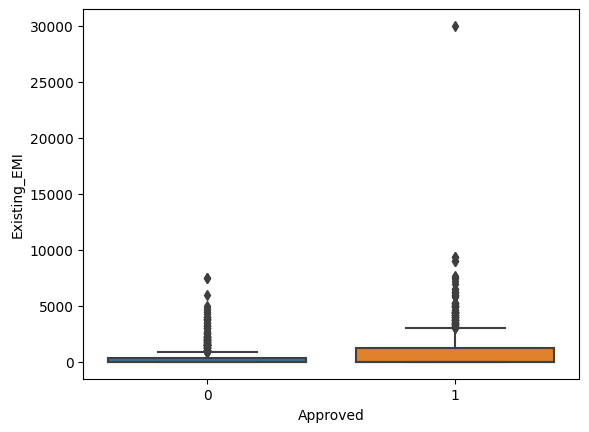

In [36]:
sns.boxplot(data = Loan , y = 'Existing_EMI' , x = 'Approved')

### 9. Feature1

In [37]:
Loan['Feature1'].value_counts()

10    734
0     439
7     401
2     226
4     182
Name: Feature1, dtype: int64

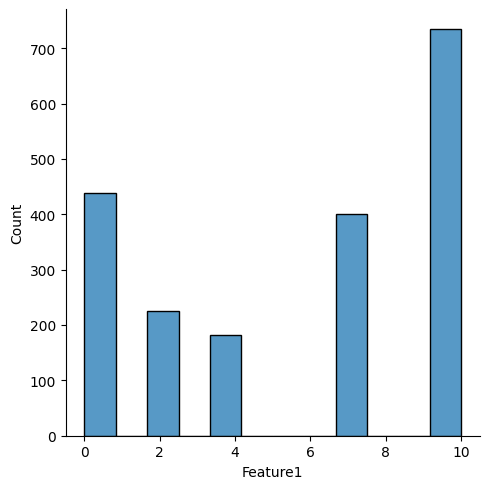

In [38]:
sns.displot(data = Loan , x = 'Feature1')

<AxesSubplot: ylabel='Feature1'>

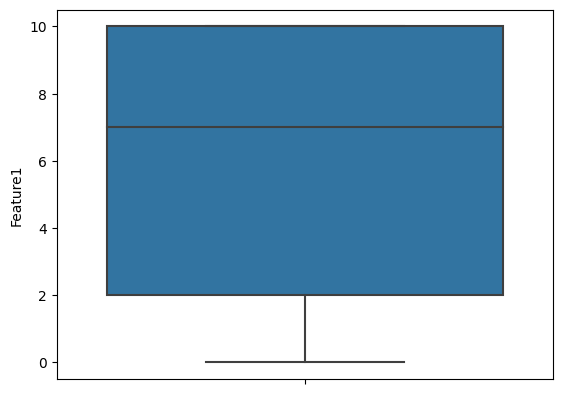

In [39]:
sns.boxplot(data = Loan , y = 'Feature1' , hue = 'Approved')

<AxesSubplot: >

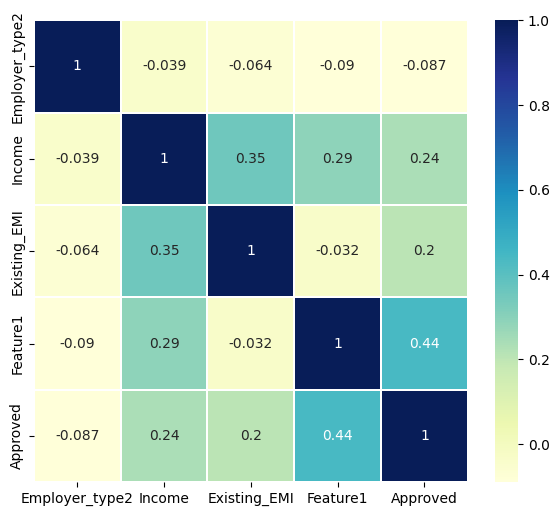

In [40]:
# Correlation Matrix of numerical variable
corr_m = Loan.corr() 
f, ax = plt.subplots(figsize =(7,6)) 
sns.heatmap(corr_m,annot=True, cmap ="YlGnBu", linewidths = 0.1) 

### Label Encoding of categorical Features

In [41]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
Loan['Gender']= le.fit_transform(Loan['Gender']) 
Loan['City_Feature']= le.fit_transform(Loan['City_Feature']) 
Loan['Employer_type1']= le.fit_transform(Loan['Employer_type1']) 
Loan['ExistingBankType']= le.fit_transform(Loan['ExistingBankType']) 
Loan['Source_Cat']= le.fit_transform(Loan['Source_Cat']) 

## Multicolinearity b/w Categorical Variable using Chi-square test

In [42]:
from scipy.stats import chi2_contingency
# categorical variables of interest
cat_vars = ['Gender', 'City_Feature', 'Employer_type1' , 'ExistingBankType' , 'Source_Cat' , 'Employer_type2']

In [43]:
results = {}
for i in range(len(cat_vars)):
    for j in range(i+1, len(cat_vars)):
        # Create a contingency table for the pair of variables
        contingency_table = pd.crosstab(Loan[cat_vars[i]], Loan[cat_vars[j]])
        
        # Perform the chi-square test of independence
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Store the results in the dictionary
        key = cat_vars[i] + ' vs ' + cat_vars[j]
        results[key] = {'chi2': chi2, 'p': p, 'dof': dof, 'expected': expected}
        
# Print the results
for key, value in results.items():
    print(key + ':')
    print('  p-value = {:.4f}'.format(value['p']))

Gender vs City_Feature:
  p-value = 0.5658
Gender vs Employer_type1:
  p-value = 0.0000
Gender vs ExistingBankType:
  p-value = 0.0211
Gender vs Source_Cat:
  p-value = 0.0003
Gender vs Employer_type2:
  p-value = 0.7760
City_Feature vs Employer_type1:
  p-value = 0.0000
City_Feature vs ExistingBankType:
  p-value = 0.0000
City_Feature vs Source_Cat:
  p-value = 0.0000
City_Feature vs Employer_type2:
  p-value = 0.0025
Employer_type1 vs ExistingBankType:
  p-value = 0.0000
Employer_type1 vs Source_Cat:
  p-value = 0.7245
Employer_type1 vs Employer_type2:
  p-value = 0.0000
ExistingBankType vs Source_Cat:
  p-value = 0.5575
ExistingBankType vs Employer_type2:
  p-value = 0.0000
Source_Cat vs Employer_type2:
  p-value = 0.2335


 A low p-value (less than 0.05) suggests that there may be a significant association between the two variables, and therefore, there may be multicollinearity between them.

#### Selected features are :  Gender , City_Feature ,Employer_type2 ,  ExistingBankType , Source_Cat for model training

In [44]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1982 non-null   int32  
 1   City_Feature      1982 non-null   int32  
 2   Employer_type1    1982 non-null   int32  
 3   Employer_type2    1982 non-null   int64  
 4   Income            1982 non-null   float64
 5   ExistingBankType  1982 non-null   int32  
 6   Source_Cat        1982 non-null   int32  
 7   Existing_EMI      1982 non-null   float64
 8   Feature1          1982 non-null   int64  
 9   Approved          1982 non-null   int64  
dtypes: float64(2), int32(5), int64(3)
memory usage: 116.3 KB


###  Divide the data in dependent and independent variable.

In [45]:
X = Loan.iloc[:,[0 , 1 , 3 , 4 ,5 , 6 , 7 , 8 ]] # Independent Variable
y = Loan.iloc[:,-1] # Dependent/Target variable

Used index location method to divide the dataset into dependent and independent

###  Split the data into train and test data with 80:20 proportion.

In [46]:
#Importing train_test_split package 
from sklearn.model_selection import train_test_split
#training data: 80%, and testing data: 20% with random_state= 0 to repeat the same training and testing data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 1)

In [47]:
# Size of training and testing dataset

print("the size of X_train data ",X_train.shape)
print("the size of X_test data ", X_test.shape)
print("the size of y_test data ", y_test.shape)
print("the size of y_train data ", y_train.shape)

the size of X_train data  (1585, 8)
the size of X_test data  (397, 8)
the size of y_test data  (397,)
the size of y_train data  (1585,)


In [48]:
# Applying standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Logistic Regression with L1 Regularization 


In [49]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression object with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model to the training data
logreg.fit(X_train_sc, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [50]:
#Showing the respective coefficients of all the variables with respect to y=churn
data_coef = pd.DataFrame(columns = ['Variables', 'Coefficient_value'])
data_coef['Variables'] = X.columns
data_coef['Coefficient_value'] = logreg.coef_[0]
data_coef

,Variables,Coefficient_value
0,Gender,0.120972
1,City_Feature,-0.016967
2,Employer_type2,-0.041184
3,Income,0.271805
4,ExistingBankType,0.157556
5,Source_Cat,0.092153
6,Existing_EMI,0.653442
7,Feature1,0.890393


In [51]:
#Prediction
y_pred_test_lr = logreg.predict(X_test_sc)
y_pred_train_lr = logreg.predict(X_train_sc)

In [52]:
#Showing the Actual v/s Predicted Values
lr_res= pd.DataFrame(columns= ['Actual','Predicted','Probability of Churning'])
lr_res['Actual']= y_test
lr_res['Predicted']= logreg.predict(X_test_sc)
lr_res['Probability of Churning']= 1-logreg.predict_proba(X_test_sc)
lr_res.head(10)

,Actual,Predicted,Probability of Churning
1340,1,1,0.782670
1441,1,1,0.530772
1512,1,1,0.728213
108,0,0,0.141463
1559,0,1,0.625306
87,0,0,0.121083
1931,1,1,0.661743
612,0,0,0.363525
1666,1,1,0.647750
1390,1,1,0.694603


In [53]:
# Accuracy of the train and test dataset
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_lr_train = accuracy_score(y_train,y_pred_train_lr)
print('Accuracy of the train data :', accuracy_lr_train)
accuracy_lr_test = accuracy_score(y_test,y_pred_test_lr) 
print('Accuracy of the test data :' , accuracy_lr_test)

Accuracy of the train data : 0.7205047318611988
Accuracy of the test data : 0.7405541561712846


### SVM

In [54]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced', probability=True) # rbf kernel is default
svc = svc.fit(X_train_sc, y_train)

In [55]:
#Prediction
y_pred_test_rbf = svc.predict(X_test_sc)
y_pred_train_rbf = svc.predict(X_train_sc)

Predicted values of train and test Data

In [56]:
#Showing the Actual v/s Predicted Values
svm_res= pd.DataFrame(columns= ['Actual','Predicted','Probability of Churning'])
svm_res['Actual']= y_test
svm_res['Predicted']= svc.predict(X_test_sc)
svm_res['Probability of Churning']= 1-svc.predict_proba(X_test_sc)
svm_res.head(10)

,Actual,Predicted,Probability of Churning
1340,1,1,0.780543
1441,1,0,0.360717
1512,1,1,0.854380
108,0,0,0.145604
1559,0,1,0.773913
87,0,0,0.171380
1931,1,1,0.711093
612,0,0,0.222677
1666,1,1,0.790908
1390,1,1,0.772956


In [57]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_SVM_train = accuracy_score(y_train,y_pred_train_rbf)
print('Accuracy of the train data :', accuracy_SVM_train)
accuracy_SVM_test = accuracy_score(y_test,y_pred_test_rbf) 
print('Accuracy of the test data :' , accuracy_SVM_test)

Accuracy of the train data : 0.7602523659305994
Accuracy of the test data : 0.743073047858942


In [58]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_test_rbf))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72       207
           1       0.69      0.85      0.76       190

    accuracy                           0.74       397
   macro avg       0.76      0.75      0.74       397
weighted avg       0.76      0.74      0.74       397



### Random Forest

In [59]:
#Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Display of the actual vs predicted and Probability values of getting Loan Approved

In [60]:
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
rf = RandomForestClassifier()

In [61]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1)

In [62]:
grid_search.fit(X_train_sc, y_train)

best_params = grid_search.best_params_

In [63]:
print(best_params)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [64]:
#Final Random Forest model with 50 trees, using entropy as criterion
rf = RandomForestClassifier(n_estimators = 50 , criterion='entropy',max_depth=10 , min_samples_leaf=4 , min_samples_split=5)

#Fitting the model with the training data
rf = rf.fit(X_train_sc, y_train)

In [65]:
# Accuracy of the train and test dataset
y_pred_rf_train = rf.predict(X_train_sc)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = rf.predict(X_test_sc)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  0.804416403785489
Test set:  0.7556675062972292


In [66]:
confusion_matrix(y_test, y_pred_rf_test)

array([[133,  74],
       [ 23, 167]], dtype=int64)

In [67]:
#Showing the Actual v/s Predicted Values
rf_res= pd.DataFrame(columns= ['Actual','Predicted','Probability of Churning'])
rf_res['Actual']= y_test
rf_res['Predicted']= rf.predict(X_test_sc)
rf_res['Probability of Churning']= 1-rf.predict_proba(X_test_sc)
rf_res.head(10)

,Actual,Predicted,Probability of Churning
1340,1,1,0.874855
1441,1,1,0.600857
1512,1,1,0.890322
108,0,0,0.016748
1559,0,1,0.608948
87,0,0,0.014754
1931,1,1,0.584323
612,0,0,0.334711
1666,1,1,0.648569
1390,1,1,0.667680


Predicted values of train and test dataset

In [68]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73       207
           1       0.69      0.88      0.77       190

    accuracy                           0.76       397
   macro avg       0.77      0.76      0.75       397
weighted avg       0.78      0.76      0.75       397



### KNN

In [69]:
# Define the KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [70]:
# Grid search hyperparameter
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
# Use grid search to find the optimal value of k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [71]:
# Get the optimal value of k
optimal_k = grid_search.best_params_['n_neighbors']
print("The optimal value of k is: {}".format(optimal_k))

The optimal value of k is: 11


In [72]:
# Train and test the KNN model using the optimal value of k
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=11)

In [73]:
# Accuracy of the train and test dataset
y_pred_knn_train = knn.predict(X_train_sc)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = knn.predict(X_test_sc)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  0.7495268138801262
Test set:  0.7355163727959698


In [74]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72       207
           1       0.68      0.84      0.75       190

    accuracy                           0.74       397
   macro avg       0.75      0.74      0.73       397
weighted avg       0.75      0.74      0.73       397



## Models Summary

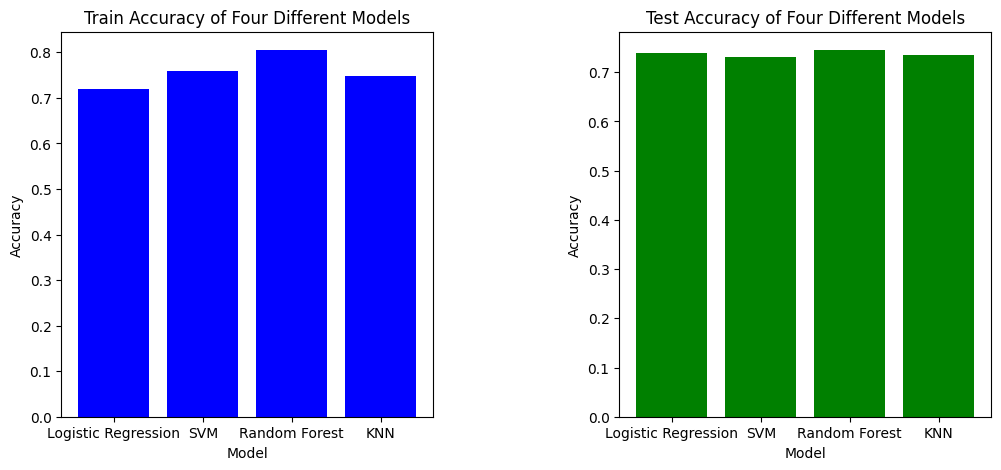

In [75]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN']

# train and test accuracy scores for each model
train_accuracy_scores = [0.72, 0.76 , 0.805, 0.749]
test_accuracy_scores = [0.74, 0.73, 0.745, 0.735]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plot the train accuracy scores in the first subplot
ax1.bar(models, train_accuracy_scores, color='blue')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train Accuracy of Four Different Models')

# Plot the test accuracy scores in the second subplot
ax2.bar(models, test_accuracy_scores, color='green')
ax2.set_xlabel('Model')
ax2.set_ylabel('Accuracy')
ax2.set_title('Test Accuracy of Four Different Models')

# Adjust the spacing between the subplots and display the figure
plt.subplots_adjust(wspace=0.5)
plt.show()

In [76]:
#calculating feature importance
importances = rf.feature_importances_*100

#creating a feature importance dataframe
impfea_df = pd.DataFrame({'Feature Name': X_train.columns, 'Importance %': importances})
impfea_df.sort_values(by= 'Importance %', ascending= False)

,Feature Name,Importance %
3,Income,52.872010
7,Feature1,16.435001
6,Existing_EMI,14.390287
0,Gender,3.925790
5,Source_Cat,3.919878
1,City_Feature,3.049402
4,ExistingBankType,2.954627
2,Employer_type2,2.453004


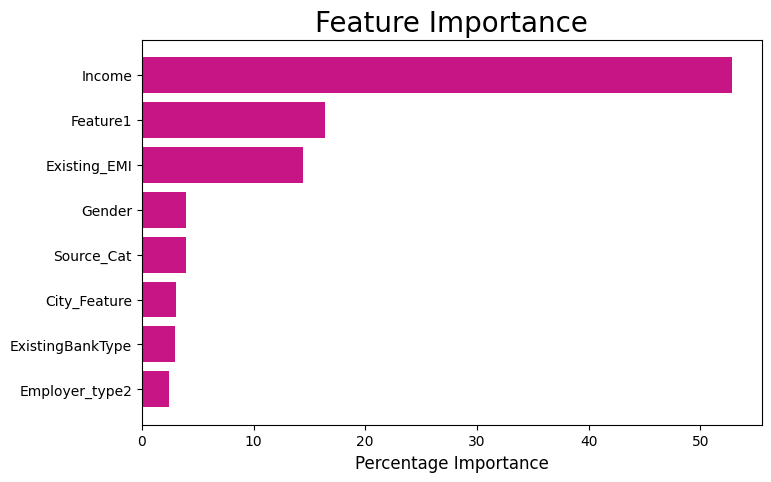

In [77]:
#sorting features in decending order of their importance
indices = np.argsort(importances)[::1] 
names = [X_train.columns[i] for i in indices]

#Visualizing feature importance
plt.figure(figsize=(8,5))
plt.barh(range(X_train.shape[1]),importances[indices], color= 'mediumvioletred')
plt.yticks(range(X_train.shape[1]), names)
plt.title("Feature Importance")
plt.title('Feature Importance', fontsize= 20)
plt.xlabel('Percentage Importance', fontsize= 12)
plt.show()

## Random forest - with 3 feature Income , Feature1 , Existing EMI

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [80]:
X1 = Loan.iloc[:,[4,7,8]]

In [81]:
# Applying standard scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)
#X_test_sc = sc.transform(X_test)

In [82]:
#Importing train_test_split package 
from sklearn.model_selection import train_test_split
#training data: 80%, and testing data: 20% with random_state= 0 to repeat the same training and testing data
X_train , X_test , y_train , y_test = train_test_split(X1 , y , test_size= 0.2 , random_state= 1)

In [83]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1)

In [85]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [86]:
rf_C = RandomForestClassifier(n_estimators = 50 , criterion='gini',max_depth=5 , min_samples_leaf=1 , min_samples_split=5)

#Fitting the model with the training data
rf_C = rf_C.fit(X_train, y_train)

In [87]:
# Accuracy of the train and test dataset
y_pred_train = rf_C.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_train)
print("Training set: ", accuracy_rf_train)

y_pred_test = rf_C.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_test)
print("Test set: ", accuracy_rf_test)

Training set:  0.7564668769716089
Test set:  0.743073047858942
